In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv('basketball_stats.csv')
df.head(3)

,points,assists,rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10


In [5]:
k = 3

In [200]:
df = df.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   points    18 non-null     float64
 1   assists   18 non-null     float64
 2   rebounds  18 non-null     float64
dtypes: float64(3)
memory usage: 564.0 bytes


In [201]:
def kmeans(original_df, original_col_cnt=3, k=3, max_iter=10, verbose=False, metric='euclidean'):  
    best_error = None
    for trial in range(10):
        df = original_df.iloc[:, :original_col_cnt].copy()
        length = len(df.columns)
        centroids = df.sample(k).reset_index(drop=True)
        print("Initial centroids from random sampling:\n\n", centroids) if verbose else None
        iteration = 0
        while iteration < 10:
            print(f"\nCurrent Iteration: {iteration}") if verbose else None
            for i in range(k):
                c = centroids.loc[i, :]

                if metric == 'euclidean':
                    df[f'C_{i}'] = df.apply(lambda x: ((x - c)**2).sum()**.5, axis=1)

                elif metric == 'manhattan':
                    df[f'C_{i}'] = df.apply(lambda x: abs(x - c).sum(), axis=1)

                elif metric == 'minkowski':
                    df[f'C_{i}'] = df.apply(lambda x: (abs(x - c)**3).sum()**(1/3), axis=1)

                else:
                    return None

            df['centroid'] = df.iloc[:, length:length+k].apply(lambda x: int(x.idxmin().split('_')[1]), axis=1)

            new_centroids = centroids.copy()
            for i in range(k):
                new_centroids.loc[i, :] = df[df['centroid'] == i].iloc[:, :length].apply(np.mean, axis=0)

            if verbose:
                print(new_centroids)
                print(centroids)    

            if centroids.equals(new_centroids):
                print("Centroids not changing!!!") if verbose else None
                break

            centroids = new_centroids
            iteration += 1
            
        original_df['center'] = df['centroid']
        original_df['error'] = df.iloc[:, length:length+k].apply(np.min, axis=1)
            
        cur_error = (original_df['error']**2).sum()
        if best_error is None or cur_error < best_error:
            best_error = cur_error
    return centroids

In [202]:
centroids = kmeans(df, metric='euclidean')
df, centroids

(    points  assists  rebounds  center     error
 0     18.0      3.0      15.0       0  3.975620
 1     19.0      4.0      14.0       0  3.624761
 2     14.0      5.0      10.0       0  3.077698
 3     14.0      4.0       8.0       0  4.913134
 4     11.0      7.0      14.0       0  5.580223
 5     20.0      8.0      13.0       0  4.946941
 6     28.0      7.0       9.0       2  2.059126
 7     30.0      6.0       9.0       2  0.916515
 8     31.0      9.0       4.0       1  4.836089
 9     35.0     12.0      11.0       2  7.735632
 10    33.0     14.0       6.0       1  7.335961
 11    25.0      9.0       5.0       1  2.226922
 12    25.0      4.0       3.0       1  7.088364
 13    27.0      3.0       8.0       2  4.758151
 14    29.0      4.0      12.0       2  3.352611
 15    30.0     12.0       7.0       1  4.152698
 16    19.0     15.0       6.0       1  8.813255
 17    23.0     11.0       5.0       1  3.599887,
       points    assists   rebounds
 0  16.000000   5.166667  12.333

In [203]:
def plot_2d(df, centroids):
    fig = plt.figure()

    plt.scatter(df.points, df.assists, c=df.center)

    plt.scatter(centroids.points, centroids.assists, marker='P')

    plt.show()

In [204]:
def plot_3d(df, centroids):
    # Step 3: Create a 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    k = len(centroids)

    # Plot each cluster in a different color
    for c in range(k):
        df_c = df[df['center'] == c]
        ax.scatter(df_c.iloc[:, 0], df_c.iloc[:, 1], df_c.iloc[:, 2], label=f'Cluster {c}')

    # Plot centroids
    ax.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], centroids.iloc[:, 2], s=300, c='red', label='Centroids', marker='x')

    # Set plot labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('KMeans Clustering in 3D')
    ax.legend()

    # Step 4: Show plot
    plt.show()

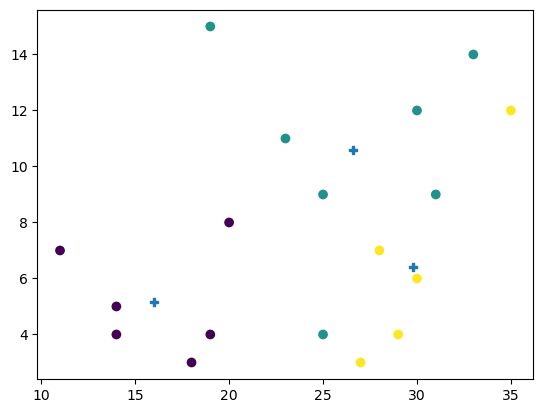

In [205]:
plot_2d(df, centroids)

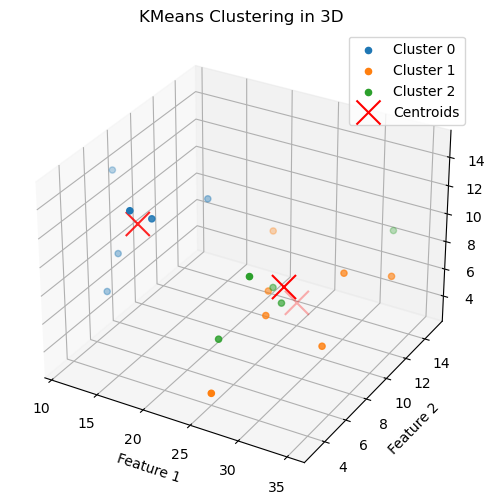

In [206]:
plot_3d(df, centroids)

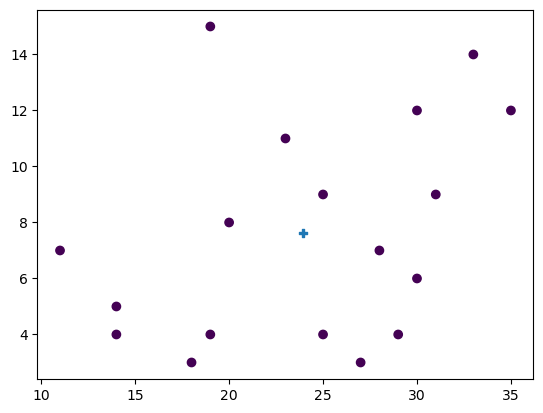

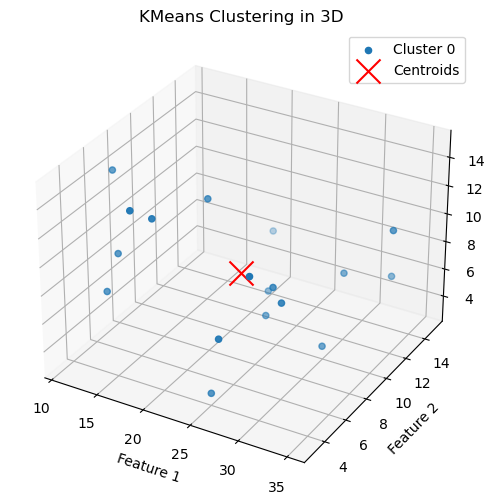

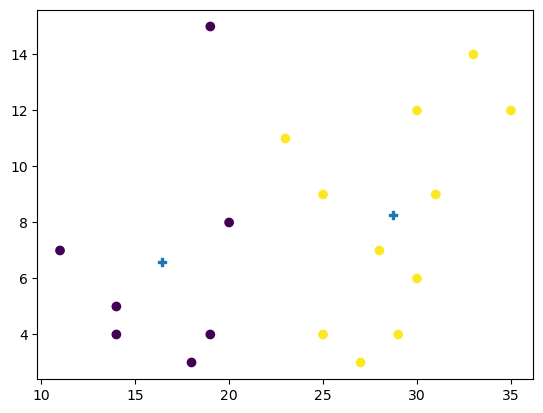

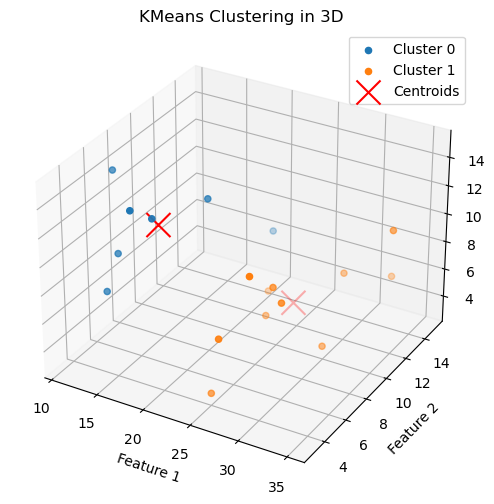

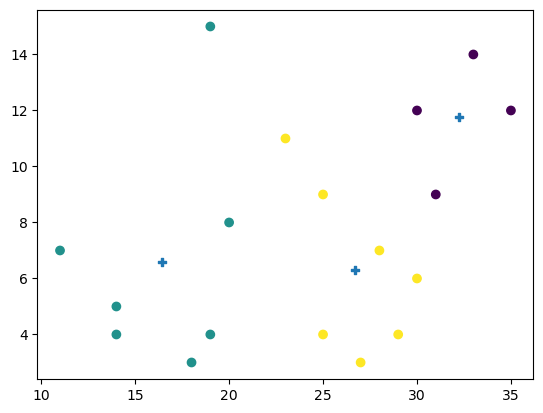

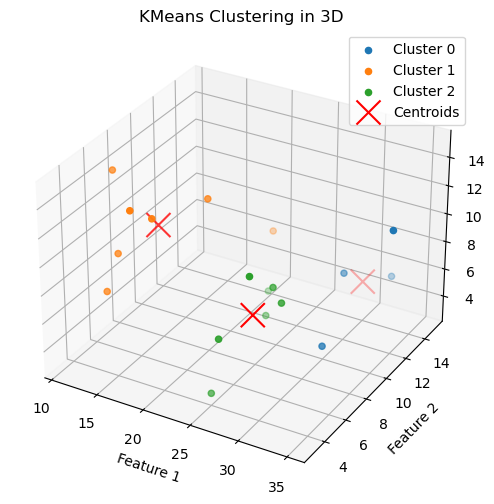

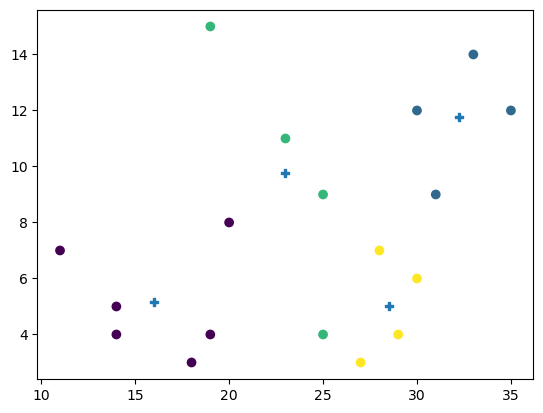

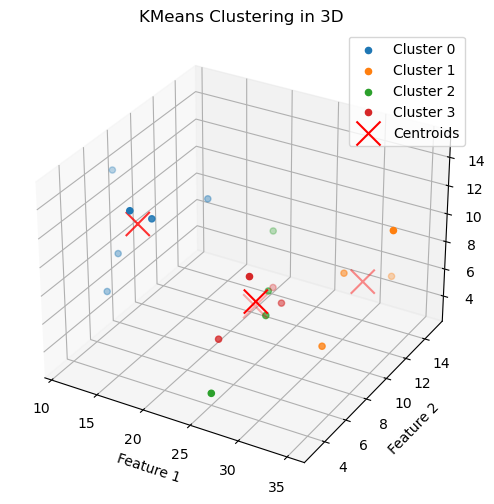

In [207]:
for k in range(1, 5):
    c = kmeans(df, k=k)
    plot_2d(df, c)
    plot_3d(df, c)

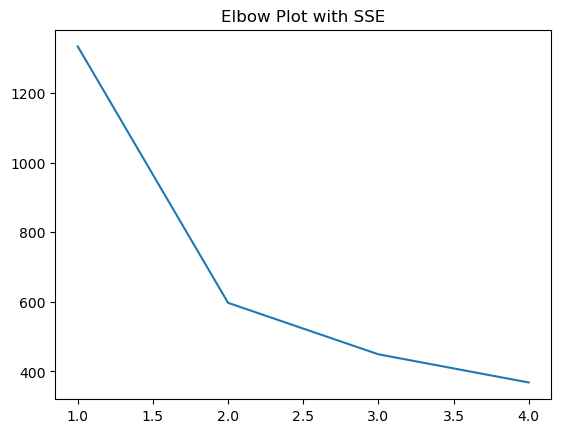

In [208]:
k_vals = []
errors = []

for k in range(1, 5):
    k_vals.append(k)
    kmeans(df, k=k)
    errors.append((df.error ** 2).sum())
    
fig = plt.figure()

plt.plot(k_vals, errors)

plt.title("Elbow Plot with SSE")
plt.show()

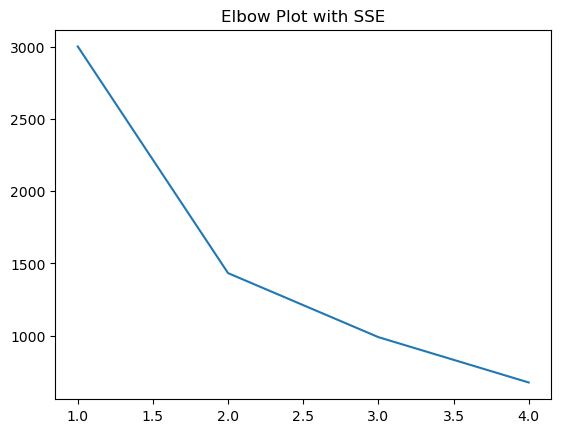

In [209]:
k_vals = []
errors = []

for k in range(1, 5):
    k_vals.append(k)
    kmeans(df, k=k, metric='manhattan')
    errors.append((df.error ** 2).sum())
    
fig = plt.figure()

plt.plot(k_vals, errors)

plt.title("Elbow Plot with SSE")
plt.show()

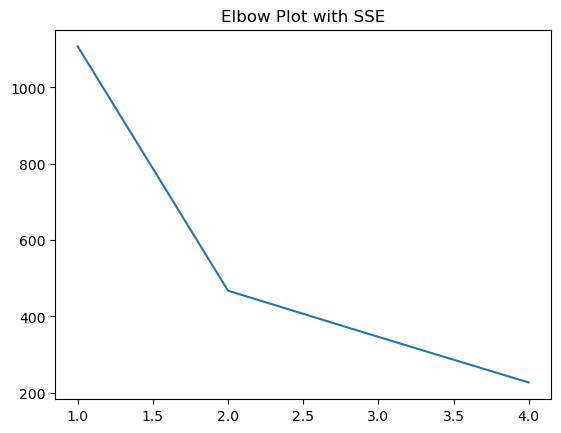

In [210]:
k_vals = []
errors = []

for k in range(1, 5):
    k_vals.append(k)
    kmeans(df, k=k, metric='minkowski')
    errors.append((df.error ** 2).sum())
    
fig = plt.figure()

plt.plot(k_vals, errors)

plt.title("Elbow Plot with SSE")
plt.show()